In [184]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [185]:

wiki_api = "https://en.wikipedia.org/w/api.php"
def get_content(article_name):
    parameters = { "action": "parse", 
                  "page": article_name,
                  "format": "json",
                  "prop": "text",
                  "formatversion": 2
                  }
                  
    response = requests.get(wiki_api, params=parameters).json()
    return response

In [186]:
def merge_contents(data):
    data = data['parse']['text'].lower()
    soup = BeautifulSoup(data, 'html.parser')
    raw_text = soup.get_text()
    raw_list = raw_text.split()
    
    return raw_list


In [187]:
def tokenize(content):
    cleaned_list = []
 
    for index, string in enumerate(content):
        content[index] = string.replace("'", "")
        if content[index].isalpha():
            cleaned_list.append(string)
    
    for index, string in enumerate(cleaned_list):
        cleaned_list[index] = re.sub(r'\.+', '', string)

    # print(f'raw_list = {content}')
    # print(f'cleaned_list = {cleaned_list}')
    return cleaned_list

In [188]:
def count_frequency(collection):
    word_count = defaultdict(int)

    for word in collection:
        word_count[word] += 1

    return word_count
    

In [189]:
def print_most_frequent(frequencies, n):
    #convert to list to slice and iterate up to n (finding the top most used words)
    sorted_words = sorted(frequencies.items(), key=lambda item: item[1], reverse=True)

    return sorted_words[:n]

In [190]:
def visualize_data(sorted_data):
 
    df = pd.DataFrame(sorted_data, columns=['word', 'frequency'])
    df = df.sort_values('frequency', ascending=True)
    df.plot(kind='barh', x='word', legend=False)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title('Most common tokens in ozone article')
    plt.show()

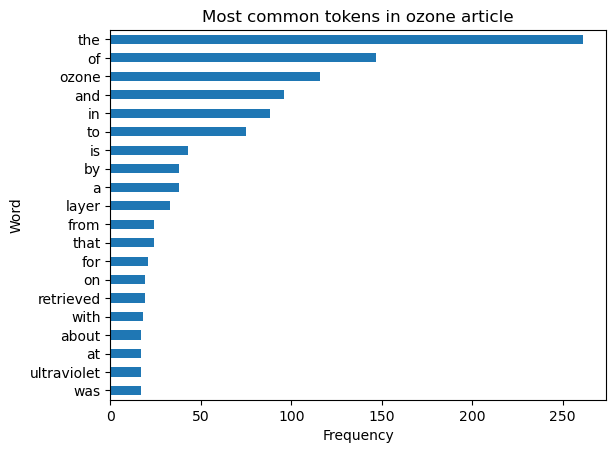

In [191]:
data = get_content("Ozone_layer")
merge_content = merge_contents(data)
collection = tokenize(merge_content)
frequencies = count_frequency(collection)
cleaned_sorted_data = print_most_frequent(frequencies, 20)
visualize_data(cleaned_sorted_data)


TODO : 
1. get rid of math html text in data output [X]
2. seperate words from words in paranthesis example = examp[word] ->> 'examp', 'word' [X]
3. extract only plain text from list [X]
4. count frequency of each word
5. find top n number of words [X]
6. vizualize output of top words used []
7. parse filler words ..(the, of, this, that etc..) []
